# **Sentiment Analysis for IMDB Dataset**

In [ ]:
!pip install -q contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.5 MB/s eta 0:00:00


## **Dataset**

In [ ]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 80.1MB/s]


In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('./IMDB-Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.isna().sum()

,0
review,0
sentiment,0


## **Preprocessing**

In [ ]:
# Select duplicate rows
duplicated_df = df[df.duplicated()]

In [ ]:
duplicated_df

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


### **Data Cleaning**

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):

    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
preprocess_text(df['review'][0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watc

In [ ]:
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
df['review'][0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watc

### **EDA**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

####**Label**

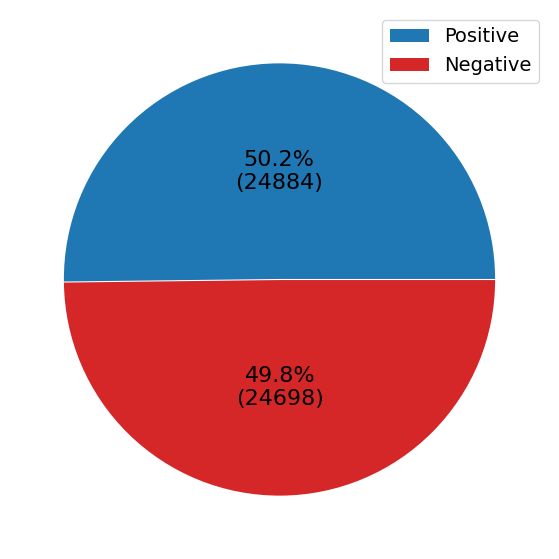

In [ ]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0],'tab:red'],textprops={'fontsize': 16})
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

#### **Text**

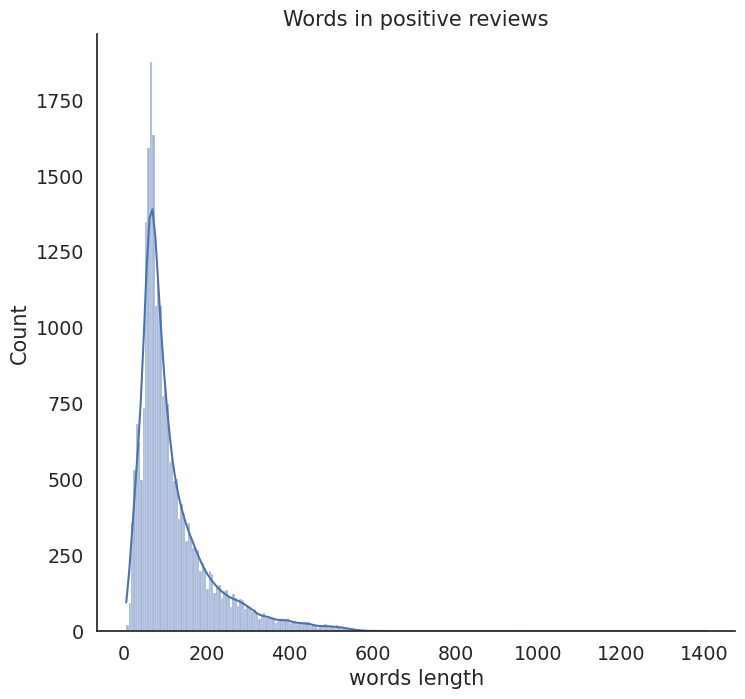

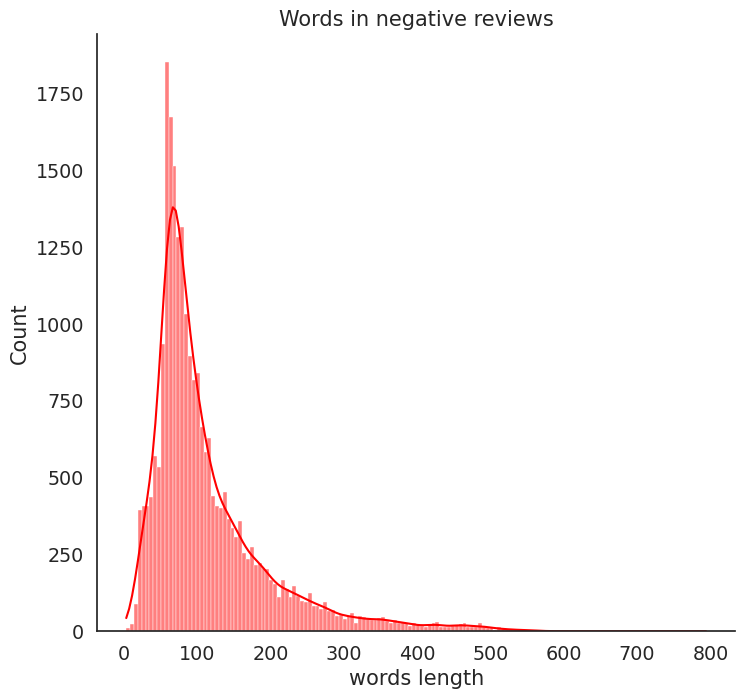

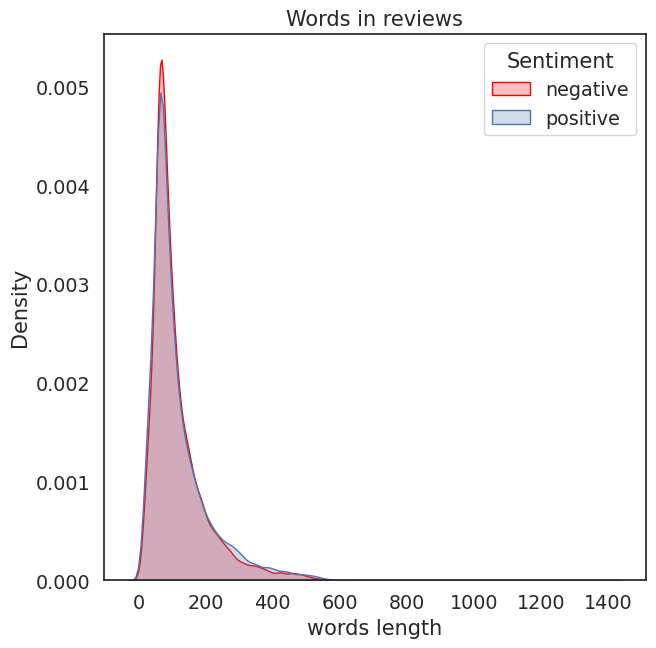

In [ ]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False,  palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot  = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True,  palette=[sns.color_palette()[0],'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

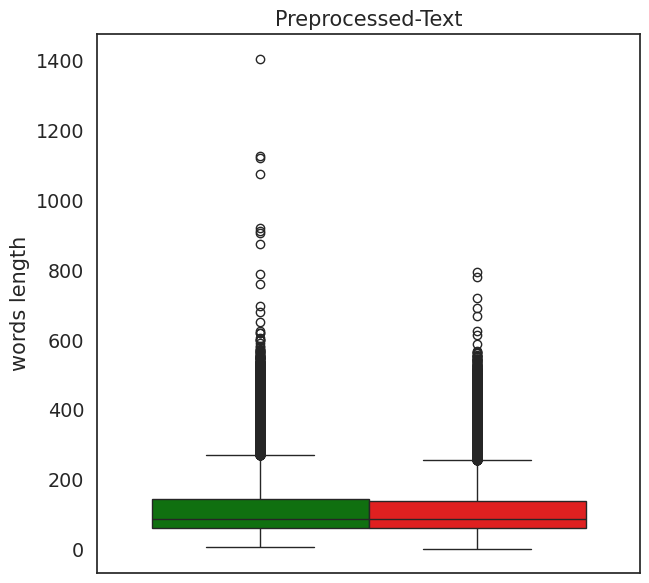

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
box_plot = sns.boxplot(
    hue="sentiment", y='words length', data=df_temp, palette=['green','red'], legend=False
).set(title='Preprocessed-Text')
plt.show(box_plot)

In [ ]:
from collections import Counter
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    if (word not in stop) :
        vocabs.append(word)
        word_counts.append(count)

In [ ]:
most[:10]

[('movie', 100605),
 ('film', 91130),
 ('one', 53525),
 ('like', 39746),
 ('would', 30811),
 ('time', 30091),
 ('good', 28905),
 ('character', 27801),
 ('story', 24600),
 ('even', 24440)]

Text(0.5, 1.0, 'Most Common Word In Job Description')

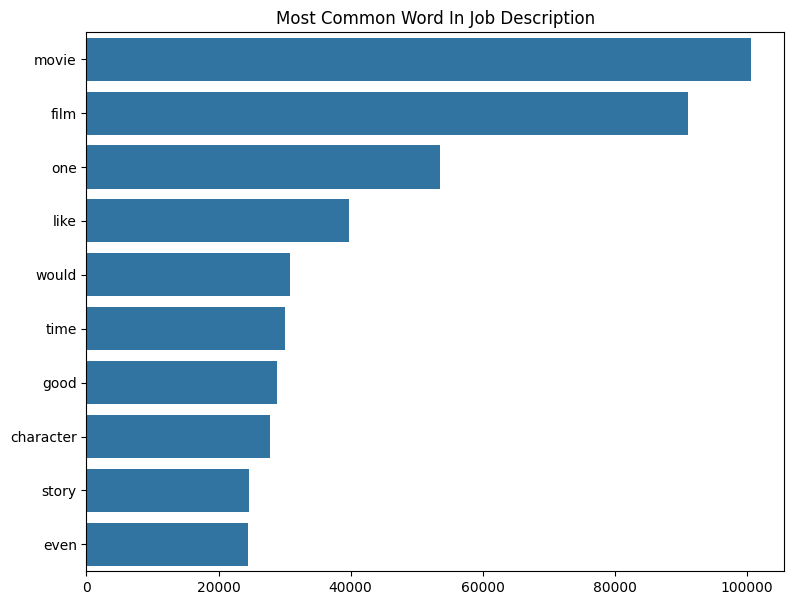

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=word_counts[:10],y=vocabs[:10])
plt.title("Most Common Word In Job Description")

In [ ]:
word_count_df = pd.DataFrame({
    'word': vocabs,
    'word_count': word_counts
})

In [ ]:
word_count_df

,word,word_count
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,would,30811
...,...,...
143137,ohsohard,1
143138,effortful,1
143139,frenchonly,1
143140,clatter,1


## **Text Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_data = df['review']

In [ ]:
x_data[:5]

,review
0,one reviewer mentioned watching oz episode hoo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...


In [ ]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

In [ ]:
y_data[:5]

array([1, 1, 1, 0, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

TfidfVectorizer(max_features=10000)

In [ ]:
x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [ ]:
x_train_encoded.shape

(39665, 10000)

## **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### **Decision Tree**

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred = dt_classifier.predict(x_test_encoded)

In [ ]:
accuracy_score(y_pred, y_test)

0.6779267923767268

In [ ]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = dt_classifier.predict(x_test_encoded)

In [ ]:
accuracy_score(y_pred, y_test)

0.7180598971463145

#### **Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=5, max_features='sqrt', bootstrap=True, random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x_test_encoded)

In [ ]:
accuracy_score(y_pred, y_test)

0.8030654431783806

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x_test_encoded)

In [ ]:
accuracy_score(y_pred, y_test)

0.8420893415347384

## **Inference**

In [ ]:
df['review'][:2]

,review
0,one reviewer mentioned watching oz episode hoo...
1,wonderful little production filming technique ...


In [ ]:
example_encoded = tfidf_vectorizer.transform(df['review'][:2])

In [ ]:
example_encoded.shape

(2, 10000)

In [ ]:
example_pred = rf_classifier.predict(example_encoded)

In [ ]:
example_pred

array([1, 1])

In [ ]:
label_encode.classes_

array(['negative', 'positive'], dtype=object)

In [ ]:
label_encode.inverse_transform(example_pred)

array(['positive', 'positive'], dtype=object)